# Datos OCDE

In [ ]:
from typing import Literal

from utils.oecd import get_oecd_data
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
from datawrapper import Datawrapper
import re

dw = Datawrapper()

type ChartType = Literal[
    "d3-bars",
    "d3-bars-split",
    "d3-bars-stacked",
    "d3-bars-bullet",
    "d3-bars-grouped",
    "d3-dot-plot",
    "d3-range-plot",
    "d3-arrow-plot",
    "column-chart",
    "grouped-column-chart",
    "stacked-column-chart",
    "d3-area",
    "d3-lines",
    "multiple-lines",
    "d3-pies",
    "d3-donuts",
    "d3-multiple-pies",
    "d3-multiple-donuts",
    "d3-scatter-plot",
    "election-donut-chart",
    "tables",
    "d3-maps-choropleth",
    "d3-maps-symbols",
    "locator-map",
]

country_map = {
    "CHE": "Suiza",
    "CHL": "Chile",
    "DEU": "Alemania",
    "ESP": "España",
    "OECD_REP": "OCDE",
    "OECD": "OCDE",
    "SWE": "Suecia"
}

base_countries = ['CHE', 'CHL', 'DEU', 'ESP', 'SWE']

def bold(text: str) -> str:
    return f'<b style="background:#FFCD00; padding:1px 4px;">{text}</b>'

def style(text: str) -> str:
    return re.sub(r"\*(.+?)\*", lambda m: bold(m.group(1)), text)

def update_chart(chart_id: str, data: pd.DataFrame, chart_type: ChartType, title: str, intro: str, source: str):
    metadata = {
        'describe': {
        'intro': intro,
        'source-name': source,
        #   'source-url': 'https://data-explorer.oecd.org/vis?lc=en&tm=pension&pg=0&snb=177&vw=ov&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_PAG%40DF_PW&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=.A.....&pd=2022%2C2022&to[TIME_PERIOD]=true&isAvailabilityDisabled=false',
        'byline': 'Centro Ruth Richardson (Universidad de las Hespérides)'
        },
        'publish': {'blocks': {'logo': {'id': 'hesperides', 'enabled': True}}},
        # 'annotate': {'notes': 'Notas adicionales'},
    }

    dw.update_chart(chart_id, data=data, title=style(title), chart_type=chart_type, metadata=metadata)

## Gasto en pensiones públicas


### Porcentaje del PIB

OECD. [Public expenditure on old-age and survivors cash benefits in % GDP](https://data-explorer.oecd.org/vis?lc=en&df[ds]=DisseminateFinalDMZ&df[id]=DSD_SOCX_AGG%40DF_PUB_OLD&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=.A..PT_B1GQ....&pd=%2C&to[TIME_PERIOD]=false&vw=tb)

In [115]:
id = "OECD.ELS.SPD,DSD_SOCX_AGG@DF_PUB_OLD,1.0/.A..PT_B1GQ...."

selected_countries = base_countries + ['OECD']

df = get_oecd_data(id)[["TIME_PERIOD", "OBS_VALUE", "REF_AREA"]]
df

,TIME_PERIOD,OBS_VALUE,REF_AREA
0,1981-01-01,NaN,AUT
1,1982-01-01,NaN,AUT
2,1983-01-01,NaN,AUT
3,1984-01-01,NaN,AUT
4,1986-01-01,NaN,AUT
...,...,...,...
1821,2017-01-01,7.908,ROU
1822,2018-01-01,7.740,ROU
1823,2019-01-01,7.682,ROU
1824,2020-01-01,8.875,ROU


PosixPath('plots/ch-gasto-pensiones-pib.png')

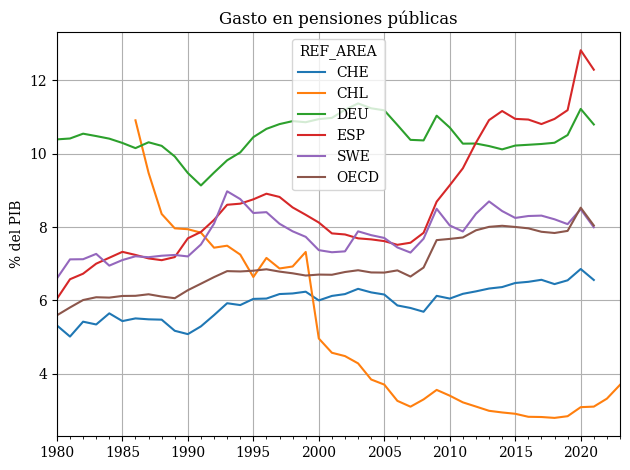

In [117]:
plot_data = df.pivot_table(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
)

plot_data.plot(y=selected_countries, title='Gasto en pensiones públicas', ylabel=r'% del PIB', xlabel='')

source = 'OECD Social Expenditure Database'
magnitude = 'Gasto en pensiones públicas, en porcentaje del PIB'

update_chart('8jrAK',
             plot_data[['DEU', 'ESP', 'OECD']].rename(columns=country_map).reset_index(),
             'd3-lines',
             '*Alemania estabiliza* el porcentaje de gasto en pensiones, *España lo dispara*',
             magnitude,
             source)
dw.export_chart('8jrAK', width=600, filepath='plots/de-gasto-pensiones-pib')

update_chart('iXq1q',
             plot_data[['CHE', 'ESP', 'OECD']].rename(columns=country_map).reset_index(),
             'd3-lines',
             '*Suiza mantiene estable* el porcentaje de gasto en pensiones, *España* lo *incrementa*',
             magnitude,
             source)
dw.export_chart('iXq1q', width=600, filepath='plots/ch-gasto-pensiones-pib')



# update_chart('GyHMt',
#              plot_data[selected_countries].rename(columns=country_map).reset_index(),
#              'd3-lines',
#              'Chile *reduce* el porcentaje de gasto en pensiones, otros lo mantienen, y España lo *dispara*',
#              magnitude,
#              source)

### Porcentaje del gasto público

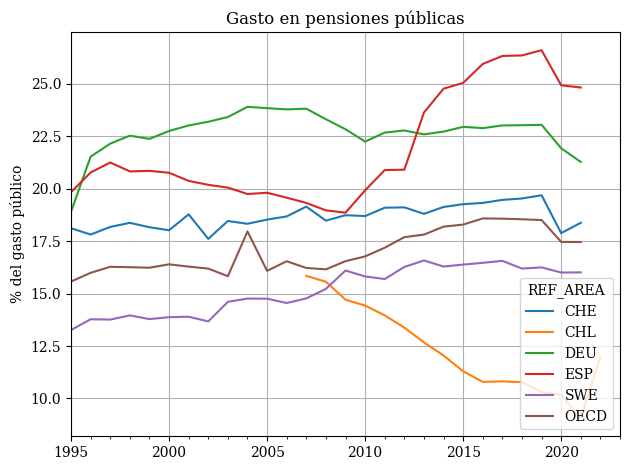

In [7]:
id = "OECD.ELS.SPD,DSD_SOCX_AGG@DF_PUB_OLD,1.0/.A..PT_OTE_S13...."

df = get_oecd_data(id)[["TIME_PERIOD", "OBS_VALUE", "REF_AREA"]]

plot_data = df.pivot_table(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
)

plot_data.plot(y=selected_countries, title='Gasto en pensiones públicas', ylabel='% del gasto público', xlabel='', xlim=['1995', None])


update_chart('C8eyv',
             plot_data[selected_countries].rename(columns=country_map).reset_index(),
             'd3-lines',
             '*Chile reduce* el gasto relativo en pensiones, *España lo dispara*',
             'Gasto en pensiones públicas, en porcentaje del gasto público',
             source)

## Pensions at a Glance

Dataset [Pensions at a Glance](https://data-explorer.oecd.org/vis?df[ds]=DisseminateFinalDMZ&df[id]=DSD_PAG%40DF_PAG&df[ag]=OECD.ELS.SPD&dq=.A.GPRR100....&pd=2019%2C2022&to[TIME_PERIOD]=true&vw=tb&lb=nm)

In [119]:
id = 'OECD.ELS.SPD,DSD_PAG@DF_PAG,/.A.....'

selected_countries = base_countries + ['OECD_REP']
source = 'OECD Pensions at a Glance'

df = get_oecd_data(id)#[["OBS_VALUE", "REF_AREA", "SEX", "MEASURE"]]

### Riqueza de pensiones

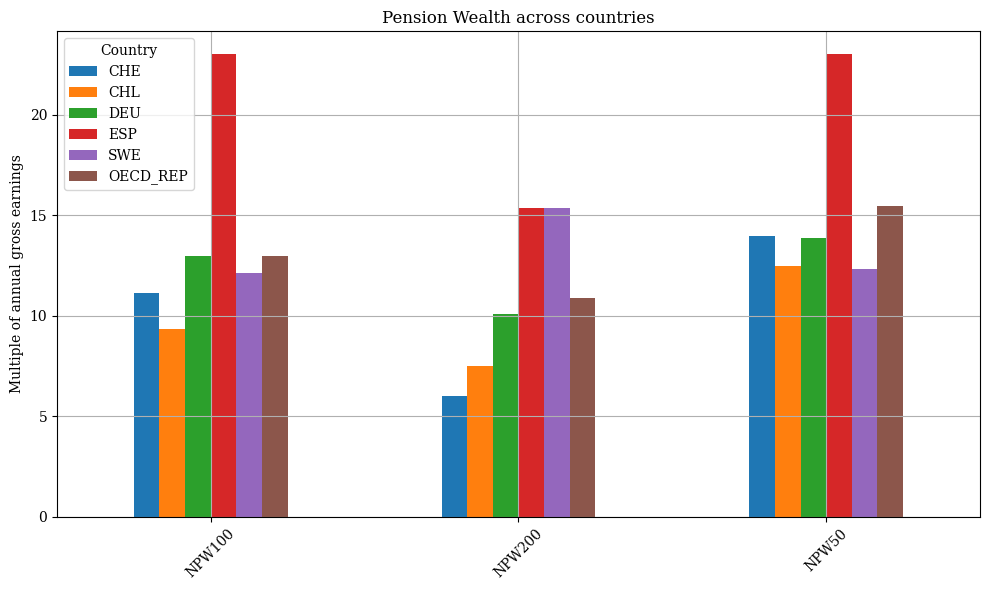

In [ ]:
df_avg = df.query('MEASURE in ["NPW50", "NPW100", "NPW200"]').groupby(["REF_AREA", "MEASURE"], as_index=False)["OBS_VALUE"].mean()

plot_data = df_avg.pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE")

# Make grouped bar chart
plot_data[selected_countries].plot(
    kind="bar",
    figsize=(10,6),
    title="Pension Wealth across countries",
    ylabel="Multiple of annual gross earnings",
    xlabel="",
    rot=45
).legend(title="Country")

# Sección cruzada
# update_chart('uLTja',
#              plot_data[selected_countries].rename(columns=country_map).reset_index(),
#              'd3-bars-grouped',
#              'Riqueza de pensiones',
#              'Valor presente de las pensiones, en múltiplo de ingresos brutos anuales',
#              source)

### Tasa de reemplazo

#### Bruta

    REF_AREA  MEASURE  OBS_VALUE
0        ARG  GPRR100      77.25
1        ARG  GPRR200      62.55
2        ARG   GPRR50     106.65
3        AUS  GPRR100      24.90
4        AUS  GPRR200      24.90
..       ...      ...        ...
151      USA  GPRR200      27.80
152      USA   GPRR50      49.40
153      ZAF  GPRR100       8.00
154      ZAF  GPRR200       4.00
155      ZAF   GPRR50      16.00

[156 rows x 3 columns]


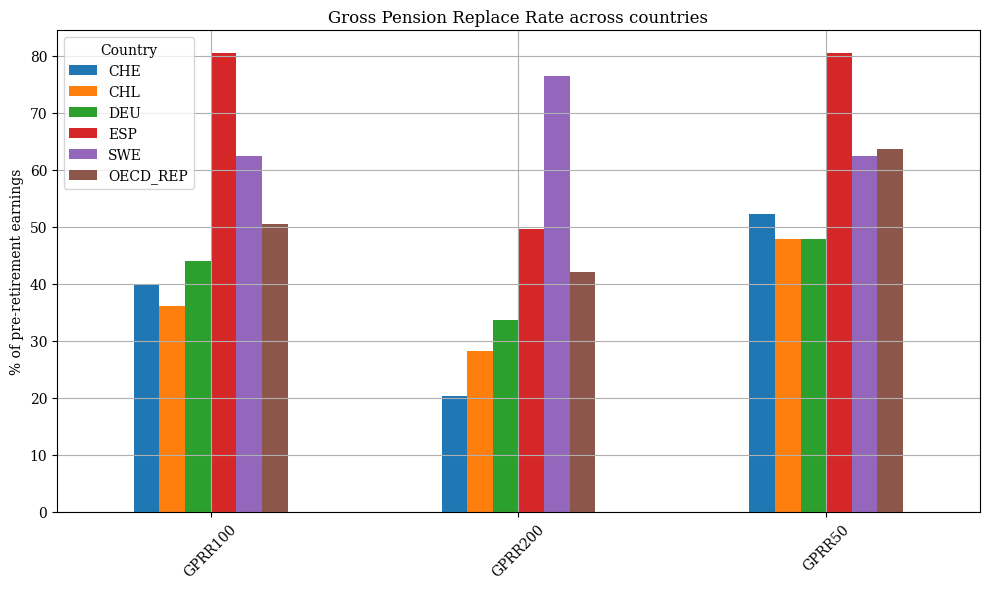

In [ ]:
df_avg = df.query('MEASURE in ["GPRR50", "GPRR100", "GPRR200"] & OPTIONALITY=="M"').groupby(["REF_AREA", "MEASURE"], as_index=False)["OBS_VALUE"].mean()
pprint(df_avg)

plot_data = df_avg.pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE")
plot_data[selected_countries].plot(
    kind="bar",
    title="Gross Pension Replace Rate across countries",
    figsize=(10,6),
    xlabel="",
    ylabel=r"% of pre-retirement earnings",
    rot=45
).legend(title="Country")

magnitude = 'Tasa de reemplazo bruta, en porcentaje de los ingresos previos a la jubliación para diferentes porcentajes de salario medio'

update_chart('MK26S',
             plot_data[["DEU", "ESP", "OECD_REP"]].rename(index={'GPRR50': '50% S.M.', 'GPRR100': '100% S.M.', 'GPRR200': '200% S.M.'}, columns=country_map).reset_index(),
             'd3-bars-grouped',
             '*España* cuenta con una tasa de reemplazo sustancialmente *más alta que Alemania*',
             magnitude,
             source)

update_chart('mRekz',
             plot_data[["CHE", "ESP", "OECD_REP"]].rename(index={'GPRR50': '50% S.M.', 'GPRR100': '100% S.M.', 'GPRR200': '200% S.M.'}, columns=country_map).reset_index(),
             'd3-bars-grouped',
             '*Suiza* cuenta con una tasa de reemplazo *muy inferior* a la de España',
             magnitude,
             source)

# # Sección cruzada
# update_chart('qhP0D',
#              plot_data[selected_countries].rename(index={'GPRR50': '50% S.M.', 'GPRR100': '100% S.M.', 'GPRR200': '200% S.M.'}, columns=country_map).reset_index(),
#              'd3-bars-grouped',
#              '*Tasa* de reemplazo bruta',
#              magnitude,
#              source)

#### Neta

<bound method Datawrapper.get_chart_display_urls of <datawrapper.__main__.Datawrapper object at 0x11b172e90>>

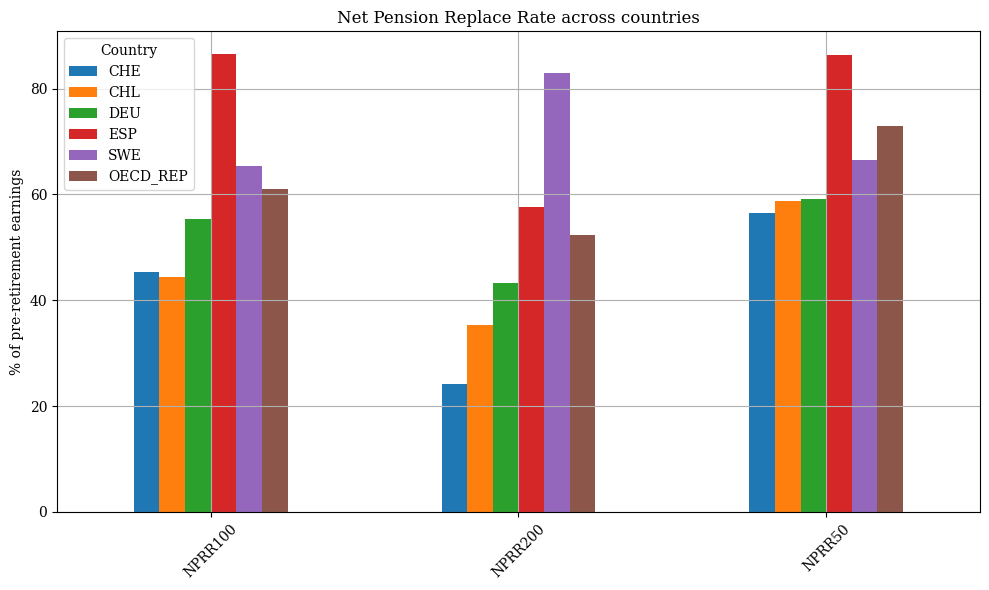

In [113]:
df_avg = df.query('MEASURE in ["NPRR50", "NPRR100", "NPRR200"] & OPTIONALITY=="M"').groupby(["REF_AREA", "MEASURE"], as_index=False)["OBS_VALUE"].mean()
plot_data = df_avg.pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE")

plot_data[selected_countries].plot(
    kind="bar",
    title="Net Pension Replace Rate across countries",
    figsize=(10,6),
    xlabel="",
    ylabel=r"% of pre-retirement earnings",
    rot=45
).legend(title="Country")

magnitude = 'Tasa de reemplazo neta, en porcentaje de los ingresos previos a la jubliación para diferentes porcentajes de salario medio'

net_replace_rate_map = {'NPRR50': '50% S.M.', 'NPRR100': '100% S.M.', 'NPRR200': '200% S.M.'}

update_chart('Eh2Ds',
             plot_data[["DEU", "ESP", "OECD_REP"]].rename(index=net_replace_rate_map, columns=country_map).reset_index(),
             'd3-bars-grouped',
             '*España* cuenta con una tasa de reemplazo sustancialmente *más alta que Alemania*',
             magnitude,
             source)
dw.export_chart('Eh2Ds', width=600, filepath='plots/de-tasa-reemplazo-neta')


update_chart('tGU3w',
             plot_data[["CHE", "ESP", "OECD_REP"]].rename(index=net_replace_rate_map, columns=country_map).reset_index(),
             'd3-bars-grouped',
             '*Suiza* cuenta con una tasa de reemplazo *muy inferior* a la de España',
             magnitude,
             source)
dw.export_chart('tGU3w', width=600, filepath='plots/ch-tasa-reemplazo-neta')

# Sección cruzada
# update_chart('TObDN',
#              plot_data[selected_countries].rename(index=net_replace_rate_map, columns=country_map).reset_index(),
#              'd3-bars-grouped',
#              'Tasa de reemplazo *neta*',
#              magnitude,
#              source)

dw.get_chart_display_urls

### Impuestos

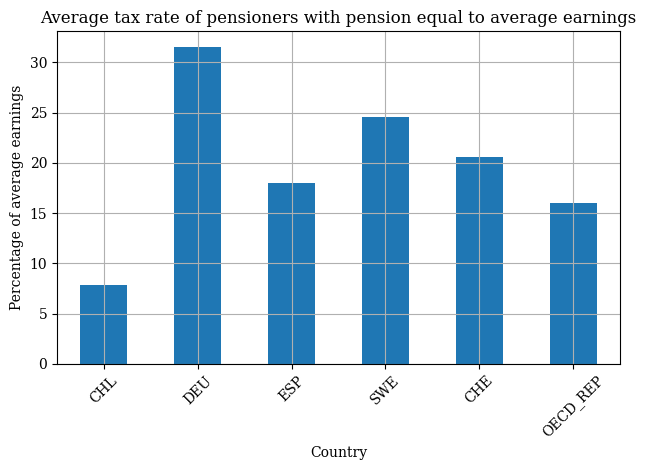

In [ ]:
plot_data = df.query('MEASURE=="ATRPPAE" & REF_AREA in @selected_countries')[["REF_AREA", "OBS_VALUE"]]

plot_data.plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    legend=False, 
    title="Average tax rate of pensioners with pension equal to average earnings",
    xlabel="Country",
    ylabel="Percentage of average earnings",
    rot=45
)

magnitude = 'Tasa impositiva media de los pensionistas con una pensión equivalente al salario medio, en porcentaje del salario medio'

# Sección cruzada
update_chart('10H8K',
             plot_data.assign(REF_AREA=plot_data["REF_AREA"].map(country_map)),
             'd3-bars',
             'Average tax rate of pensioners with pension equal to average earnings',
             magnitude,
             source)

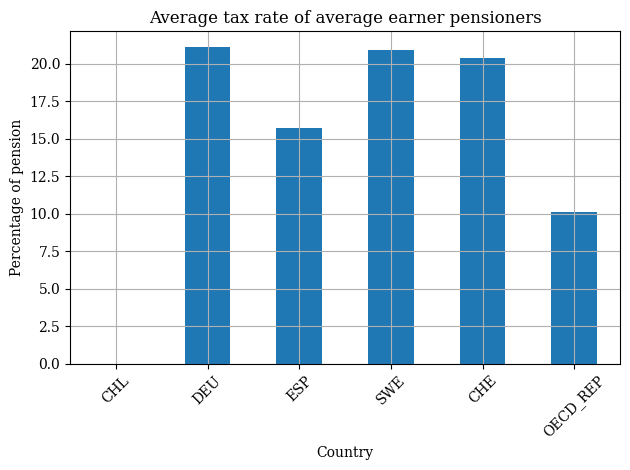

In [28]:
plot_data = df.query('MEASURE=="ATRAEP" & REF_AREA in @selected_countries')[["REF_AREA", "OBS_VALUE"]]

plot_data.plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    legend=False, 
    title="Average tax rate of average earner pensioners",
    xlabel="Country",
    ylabel="Percentage of pension",
    rot=45
)

magnitude = 'Tasa impositiva media de los pensionistas con ingresos medios, en porcentaje de la pensión'

# Sección cruzada
update_chart('BAGnC',
             plot_data.assign(REF_AREA=plot_data["REF_AREA"].map(country_map)),
             'd3-bars',
             magnitude,
             magnitude,
             source)

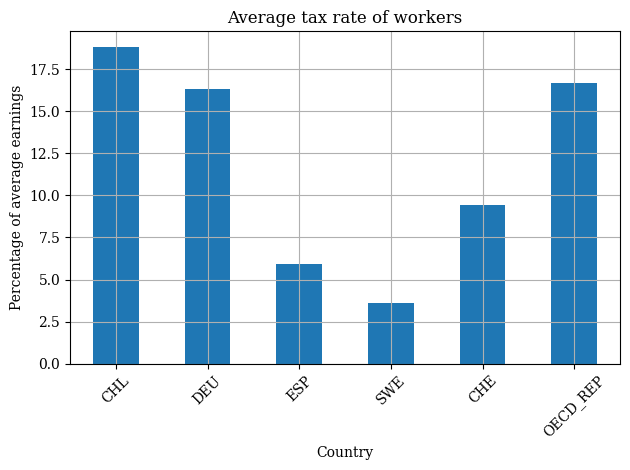

In [30]:
plot_data = df.query('MEASURE=="ATRW" & REF_AREA in @selected_countries')[["REF_AREA", "OBS_VALUE"]]

plot_data.plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    legend=False, 
    title="Average tax rate of workers",
    xlabel="Country",
    ylabel="Percentage of average earnings",
    rot=45
)

magnitude = 'Tasa impositiva media de los trabajadores, porcentaje del salario medio'

# Sección cruzada
update_chart('JKsor',
             plot_data.assign(REF_AREA=plot_data["REF_AREA"].map(country_map)),
             'd3-bars',
             magnitude,
             magnitude,
             source)

### Ratio de pobreza

/var/folders/_k/cjs92jqd55d7zxsb0vw54b640000gn/T/ipykernel_13660/2948660733.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  plot_data = df.query('MEASURE=="OAIP" & REF_AREA in @selected_countries & AGE=="Y_GE66" & SEX=="_T" & TIME_PERIOD=="2016-01-01"')[["REF_AREA", "OBS_VALUE"]]


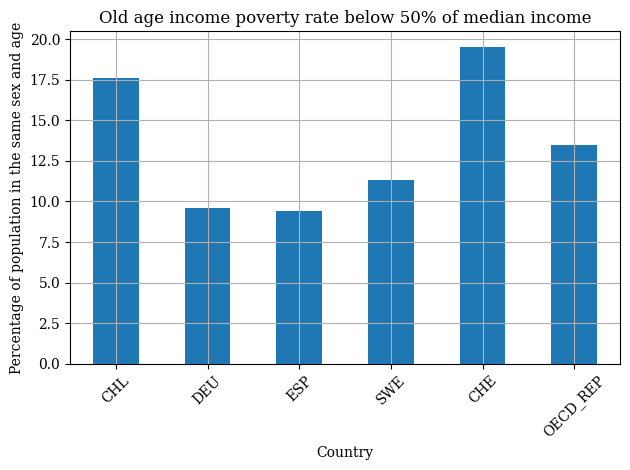

In [35]:
plot_data = df.query('MEASURE=="OAIP" & REF_AREA in @selected_countries & AGE=="Y_GE66" & SEX=="_T" & TIME_PERIOD=="2016-01-01"')[["REF_AREA", "OBS_VALUE"]]

plot_data.plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar", 
    legend=False, 
    title=r"Old age income poverty rate below 50% of median income",
    xlabel="Country",
    ylabel="Percentage of population in the same sex and age",
    rot=45
)

magnitude = r'Tasa de pobreza relativa en la vejez (ingresos inferiores al 50 % de la renta mediana), expresada como porcentaje de la población del mismo sexo y grupo de edad'

# Sección cruzada
update_chart('A2GMB',
             plot_data.assign(REF_AREA=plot_data["REF_AREA"].map(country_map)),
             'd3-bars',
             magnitude,
             magnitude,
             source)

### Gasto público

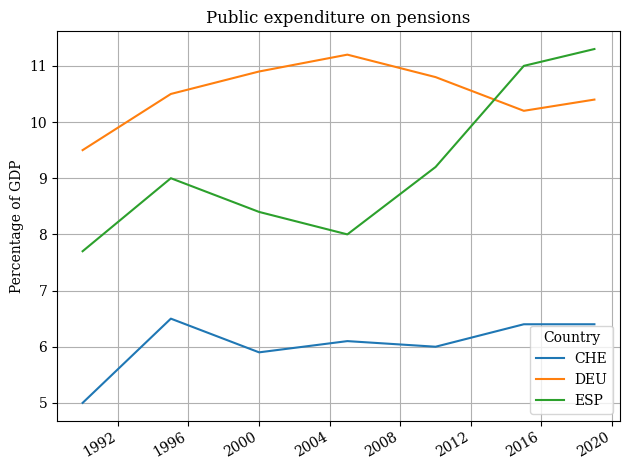

In [14]:
df.query('MEASURE=="PEP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Public expenditure on pensions",
    xlabel="",
    ylabel="Percentage of GDP",
)
plt.legend(title="Country")

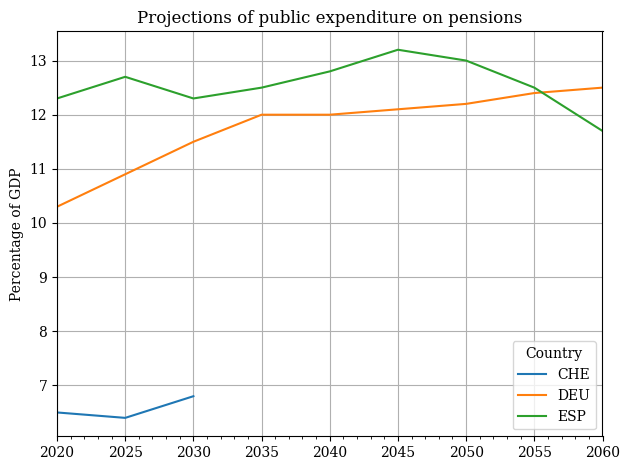

In [15]:
df.query('MEASURE=="PPEP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Projections of public expenditure on pensions",
    xlabel="",
    ylabel="Percentage of GDP",
)
plt.legend(title="Country")

### Fuente de los ingresos

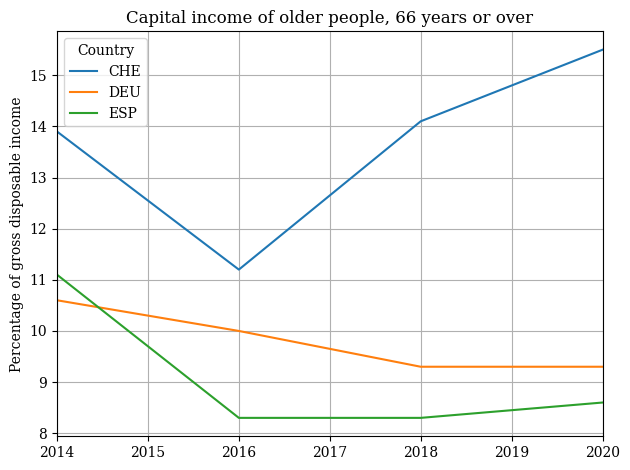

In [16]:
df.query('MEASURE=="CIOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Capital income of older people, 66 years or over",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

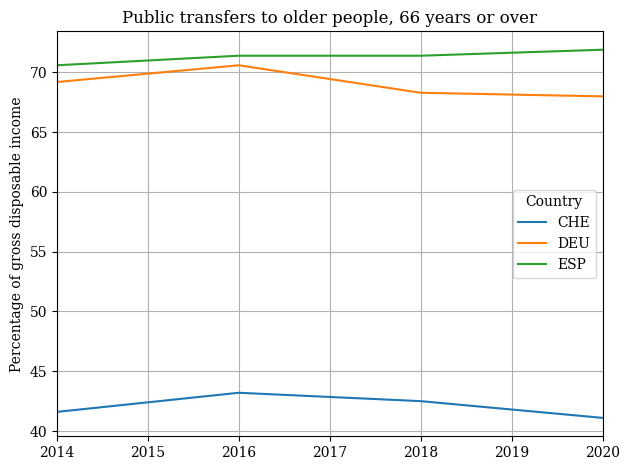

In [17]:
df.query('MEASURE=="PTOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Public transfers to older people, 66 years or over",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

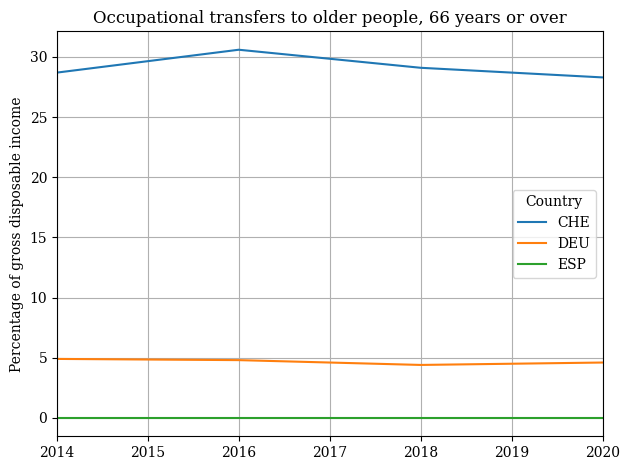

In [18]:
df.query('MEASURE=="OCOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Occupational transfers to older people, 66 years or over",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

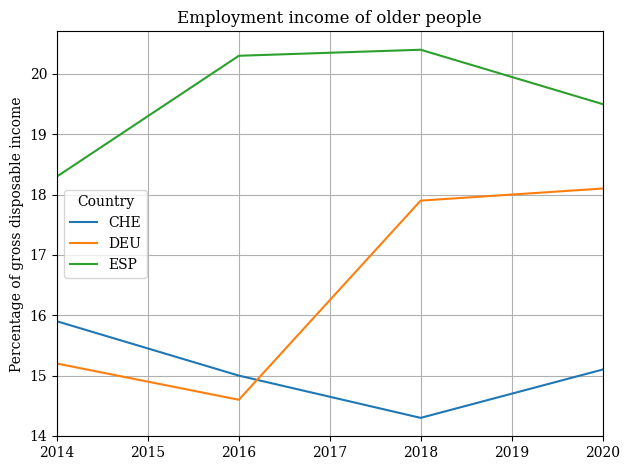

In [19]:
df.query('MEASURE=="EIOP" & REF_AREA in ["CHE", "DEU", "ESP"]').pivot(columns="REF_AREA", values="OBS_VALUE").plot(
    title="Employment income of older people",
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
plt.legend(title="Country")

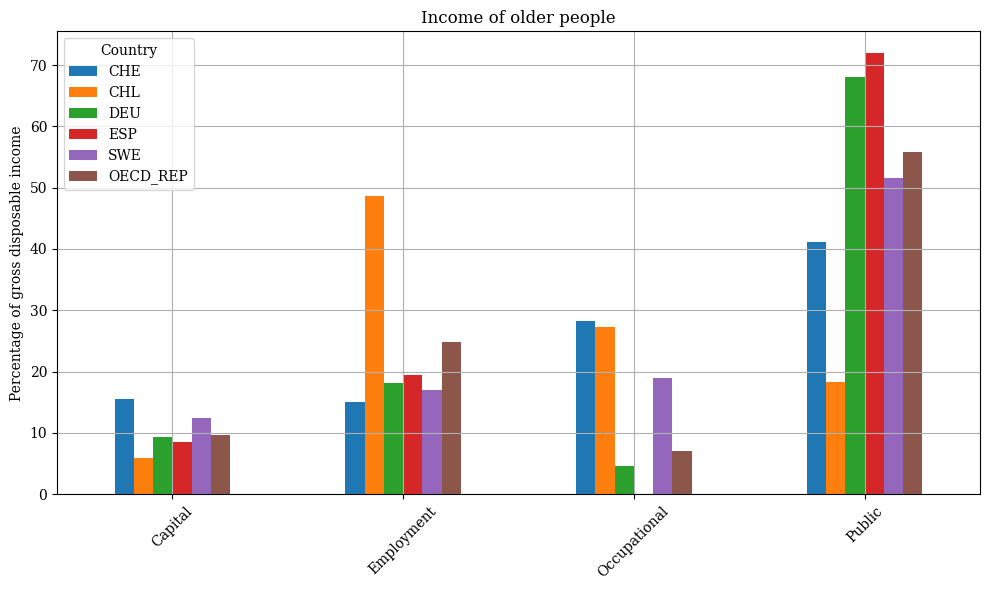

In [121]:
subset = df.query('MEASURE in ["EIOP", "CIOP", "OCOP", "PTOP"]')
latest_entry = subset.loc[subset["TIME_PERIOD"]==subset["TIME_PERIOD"].max()]
plot_data = latest_entry.pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE")

ax = plot_data[selected_countries].plot(
    kind="bar",
    title="Income of older people",
    figsize=(10,6),
    xlabel="",
    ylabel="Percentage of gross disposable income",
)
ax.set_xticklabels(["Capital", "Employment", "Occupational", "Public"], rotation=45)
ax.legend(title="Country")

magnitude = 'Ingresos de las personas mayores, en porcentaje de la renta disponible bruta'

income_map = {
    "EIOP": "Empleo",
    "OCOP": "Transferencias ocupacionales",
    "PTOP": "Transferencias públicas",
    "CIOP": "Ingreso del capital"
}

update_chart('8f1ZO',
             plot_data[selected_countries].rename(columns=country_map, index=income_map).reset_index(),
             'd3-bars-grouped',
             magnitude,
             magnitude,
             source)


PosixPath('plots/ch-ingresos.png')

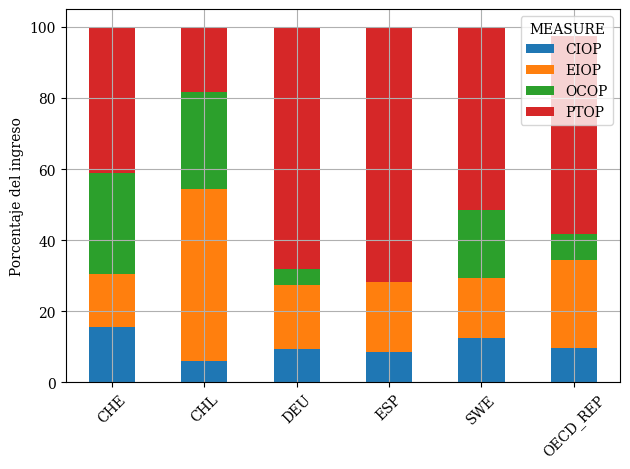

In [122]:
plot_data = latest_entry.pivot(index="REF_AREA", columns="MEASURE", values="OBS_VALUE")

plot_data.loc[selected_countries].plot(kind='bar', stacked=True, rot=45, xlabel='', ylabel='Porcentaje del ingreso')

magnitude = 'Porcentaje del ingreso bruto disponible de la población de 65 años o más'

update_chart('fWgQA',
             plot_data.loc[["DEU", "ESP", "OECD_REP"]].rename(columns=income_map, index=country_map).reset_index(),
             'd3-bars-stacked',
             'España y Alemania *comparten* una *distribución de ingresos* en mayores similar',
             magnitude,
             source)
dw.export_chart('fWgQA', width=600, filepath='plots/de-ingresos')

update_chart('brIjD',
             plot_data.loc[["CHE", "ESP", "OECD_REP"]].rename(columns=income_map, index=country_map).reset_index(),
             'd3-bars-stacked',
             'España y Suiza difieren sustancialmente en la distribución de ingresos en mayores',
             magnitude,
             source)
dw.export_chart('brIjD', width=600, filepath='plots/ch-ingresos')

# Sección cruzada
# update_chart('gWYCK',
#              plot_data.loc[selected_countries].rename(columns=income_map, index=country_map).reset_index(),
#              'd3-bars-stacked',
#              magnitude,
#              magnitude,
#              source)
# 

### Esperanza de vida tras salida del mercado laboral

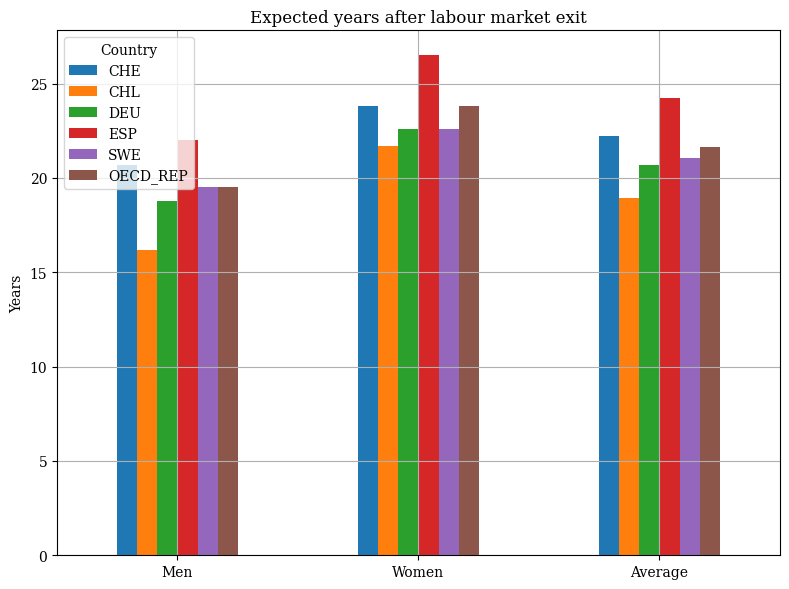

In [93]:
subset = df.query('MEASURE=="EYLME"')

latest_entry = subset.loc[subset["TIME_PERIOD"]==subset["TIME_PERIOD"].max()].copy()

# 3) Wide table: rows=countries, cols=sex
wide = latest_entry.pivot(index="REF_AREA", columns="SEX", values="OBS_VALUE")

# 4) Compute (simple) average of men & women
wide["Average"] = wide[["M", "F"]].mean(axis=1)

# 5) Nicer column names & consistent order
wide = wide.rename(columns={"M": "Men", "F": "Women"})[["Men", "Women", "Average"]]

ax = wide.T[selected_countries].plot(
    kind="bar",
    figsize=(8,6),
    title="Expected years after labour market exit",
    xlabel="",
    ylabel="Years"
)

ax.legend(title="Country", loc="best")
ax.tick_params(axis="x", labelrotation=0)

In [96]:
display(wide.T)

magnitude = 'Años esperados después de la salida del mercado laboral, en años'
update_chart('7ez2x',
             wide.T[selected_countries].rename(columns=country_map, index={"Men": "Hombres", "Women": "Mujeres", "Average": "Promedio"}).reset_index(),
             'd3-bars-grouped',
             magnitude,
             magnitude,
             source)

REF_AREA,AUS,AUT,BEL,CAN,CHE,CHL,COL,CRI,CZE,DEU,...,NOR,NZL,OECD_REP,POL,PRT,SVK,SVN,SWE,TUR,USA
SEX,,,,,,,,,,,,,,,,,,,,,
Men,20.5,21.60,22.2,20.2,20.70,16.20,13.0,14.80,15.80,18.8,...,19.80,18.50,19.50,15.10,17.50,15.70,20.4,19.50,18.10,18.0
Women,23.5,25.50,25.2,24.0,23.80,21.70,21.2,21.10,21.50,22.6,...,24.50,22.20,23.80,22.20,22.60,20.20,26.2,22.60,23.60,20.6
Average,22.0,23.55,23.7,22.1,22.25,18.95,17.1,17.95,18.65,20.7,...,22.15,20.35,21.65,18.65,20.05,17.95,23.3,21.05,20.85,19.3


### Ratio de fertilidad

<Axes: title={'center': 'Fertility rate'}, ylabel='Children per woman'>

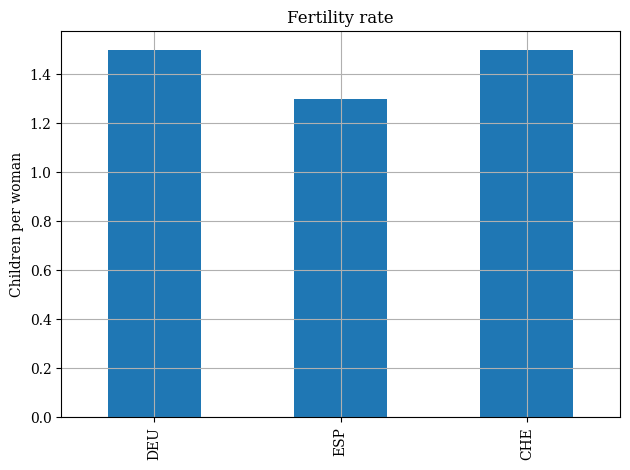

In [ ]:
df.query('MEASURE=="FR" & REF_AREA in ["CHE", "DEU", "ESP"]').plot(
    x="REF_AREA", 
    y="OBS_VALUE", 
    kind="bar",
    title="Fertility rate",
    xlabel="",
    ylabel="Children per woman",
    legend=False
)

## Eurostat

Ejemplo:
- [Old-age-dependency ratio](https://ec.europa.eu/eurostat/databrowser/view/tps00198/default/table?lang=en)

In [ ]:
import pandas as pd

url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/3.0/data/dataflow/ESTAT/tps00198/1.0/*.*.*?c[freq]=A&c[indic_de]=OLDDEP1&compress=true&format=csvdata&formatVersion=2.0&lang=en&labels=name'
df = pd.read_csv(url, compression='gzip')

In [ ]:
df['geo'].unique()

array(['AD', 'AL', 'AM', 'AT', 'AZ', 'BE', 'BG', 'BY', 'CH', 'CY', 'CZ',
       'DE', 'DK', 'EA19', 'EA20', 'EE', 'EL', 'ES', 'EU27_2020', 'FI',
       'FR', 'FX', 'GE', 'HR', 'HU', 'IE', 'IS', 'IT', 'LI', 'LT', 'LU',
       'LV', 'MC', 'MD', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO',
       'RS', 'RU', 'SE', 'SI', 'SK', 'SM', 'TR', 'UA', 'UK', 'XK'],
      dtype=object)

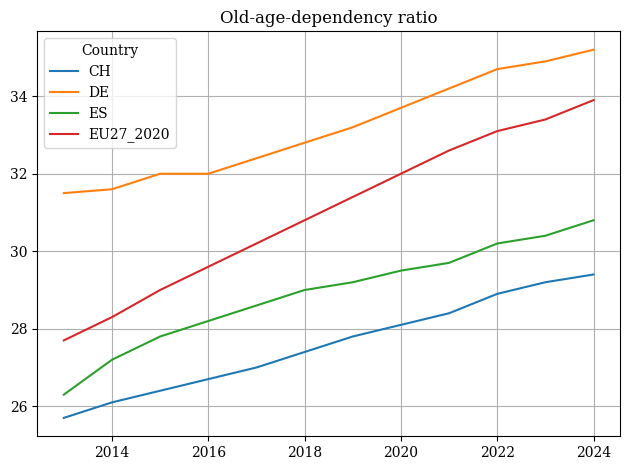

In [ ]:
ax = df.query('geo in ["CH", "ES", "DE", "EU27_2020"]').pivot(index="TIME_PERIOD", columns="geo", values="OBS_VALUE").plot(
    title='Old-age-dependency ratio',
    xlabel=''
)
ax.legend(title='Country')